In [16]:
#Bruno Marra de Melo - 3029

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format

In [28]:
def createDay(row):
    return row['InvoiceDate'].split(" ")[0]

In [29]:
df = pd.read_csv('/code/src/Atividades/atividade5/Dataset.csv', index_col=False, squeeze=True)

#unit price veio como string, realizando a conversão para float
df["UnitPrice"] = [x.replace(",", ".") for x in df["UnitPrice"]]
df["UnitPrice"] = df["UnitPrice"].astype(float)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['day'] = df.apply (lambda row: createDay(row), axis=1)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.00,United Kingdom,15.30,12/1/10
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.00,United Kingdom,20.34,12/1/10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.00,United Kingdom,22.00,12/1/10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.00,United Kingdom,20.34,12/1/10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.00,United Kingdom,20.34,12/1/10


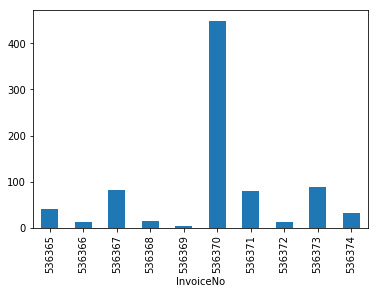

In [18]:
#1. Faça um gráfico de barras mostrando a quantidade vendida total de cada um dos 10 primeiros produtos do Dataframe
df.groupby('InvoiceNo')['Quantity'].sum()[0:10].plot(kind="bar")
plt.show()

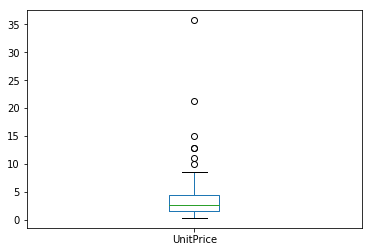

In [43]:
#2. Faça um Boxplot dos preços unitários dos produtos. Considere somente os 100 produtos mais vendidos.
hundredBest = df.groupby('InvoiceNo')['Quantity'].sum().sort_values().tail(100)
df.loc[hundredBest]['UnitPrice'].plot.box()
plt.show()

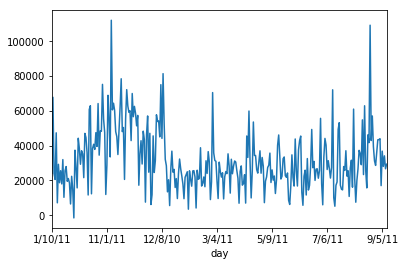

In [60]:
#3. Faça um gráfico de linhas mostrando o faturamento (total de vendas) por dia.
df.groupby('day')['TotalPrice'].sum().plot(kind="line")
plt.show()

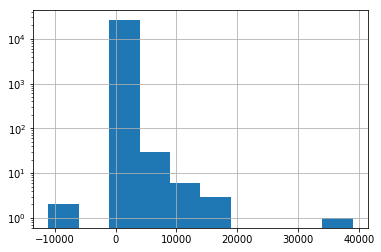

In [37]:
#4. Faça o histograma da média dos preços unitários dos produtos.
df.groupby('InvoiceNo')['UnitPrice'].mean().hist()
plt.yscale('log')
plt.show()

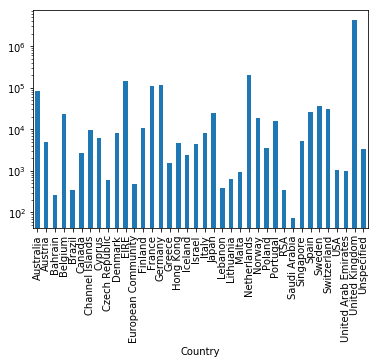

In [39]:
#5. Faça dois gráficos de barras, sendo um da quantidade de compras e outro do total de faturamento por país.
df.groupby('Country')['Quantity'].sum().plot(kind="bar")
plt.yscale('log')
plt.show()

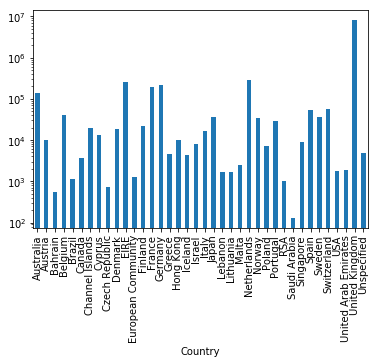

In [40]:
df.groupby('Country')['TotalPrice'].sum().plot(kind="bar")
plt.yscale('log')
plt.show()

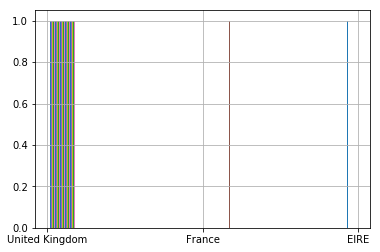

In [61]:
#6. Considerando os 100 produtos mais vendidos, é possível visualizar alguma diferença entre a distribuição 
#dos preços unitários desses produtos ao se comparar os países “Australia” e “United Kingdom”? 
#Faça um gráfico que ajude a responder.

df.loc[hundredBest]['Country'].hist()
plt.show()

#Como podemos observar, considerando somente os 100 produtos mais vendidos, podemos ver que nenhum produto da
#Austrália compõe esse grupo e, portanto, não faz muito sentido fazer uma comparação.